## Practice Exercise (Polynomial Regression)

In [97]:
from pathlib import Path
import sys

current_dir = Path.cwd()
project_root = current_dir.parent.absolute()

sys.path.insert(0,str(project_root))

from config import DATASETS_DIR, ENGINE_EFFICIENCY

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv(ENGINE_EFFICIENCY)

print(f'Shape of the df: {df.shape}\n')
print(f'Summary of dataset:\n {df.describe().round(2)}')

Shape of the df: (13, 3)

Summary of dataset:
            RPM  Efficiency_percent  Temperature_C
count    13.00               13.00          13.00
mean   4000.00               79.54         120.77
std    1947.22               11.90          30.20
min    1000.00               57.00          85.00
25%    2500.00               71.00          96.00
50%    4000.00               84.00         114.00
75%    5500.00               89.00         141.00
max    7000.00               93.00         177.00


In [100]:
#feature and target variables
X = df[['RPM']].values
y_eff = df['Efficiency_percent']
y_temp = df['Temperature_C']



□ Step 1: Load and explore data
          • Notice there are TWO potential target variables!
          • We'll focus on Efficiency first

□ Step 2: Polynomial regression on Efficiency
          • Try degrees 2, 3, 4
          • Find best fit

□ Step 3: Find optimal RPM for efficiency
          • At what RPM is efficiency maximum?
          • What is the maximum efficiency?

□ Step 4: Polynomial regression on Temperature
          • Is temperature vs RPM linear or polynomial?
          • What degree works best?

□ Step 5: Create a DUAL-AXIS visualization
          • Left axis: Efficiency (blue)
          • Right axis: Temperature (red)
          • Both vs RPM

□ Step 6: Find the "sweet spot"
          • Where is efficiency > 85%?
          • At those RPMs, what's the temperature range?
          • Is there a trade-off between efficiency and heat?

□ Step 7: Engineer's recommendation
          • What RPM range would you recommend for:
            a) Maximum efficiency driving?
            b) Cool running (low temperature)?
            c) Best balance of both?y

#### Polynomial regression on Efficiency
          • Try degrees 2, 3, 4
          • Find best fit

In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

degrees = [2,3,4]

results = {}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly,y_eff)

    pred_y = model.predict(X_poly)

    R2_eff = r2_score(y_eff,pred_y)

    msc = mean_squared_error(y_eff,pred_y)

    intercept = model.intercept_

    coef = model.coef_

    results[degree]={
        'R2_eff' : R2_eff,
        'model': model,
        'poly' : poly,
        'intercept' : intercept,
        'coef' : coef,
        'msc': msc
    }

    print(f'R2 and Mean Squared Error Score for the {degree} is {results[degree]['R2_eff']:.4f} and {results[degree]['msc']:.4f}\n')


R2 and Mean Squared Error Score for the 2 is 0.9956 and 0.5774

R2 and Mean Squared Error Score for the 3 is 0.9993 and 0.0933

R2 and Mean Squared Error Score for the 4 is 0.9994 and 0.0754



### Visualization of the data




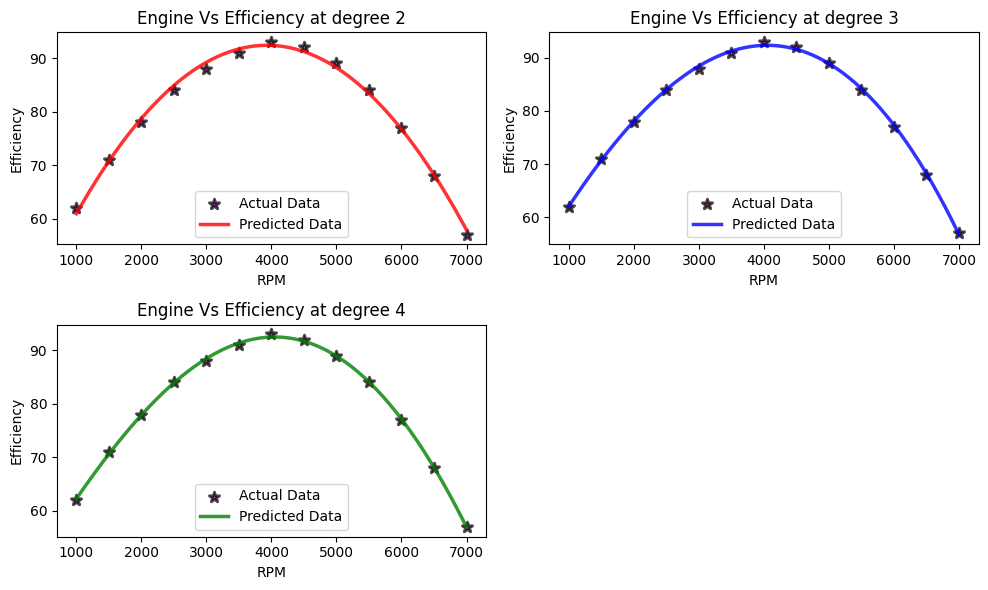

In [102]:
degrees  = [2,3,4]
colors= ['r','blue','green']
plt.figure(figsize=(10,6))

for idx, degree in enumerate(degrees):
    plt.subplot(2,2,idx+1)
    
    #ffit the model
    poly = results[degree]['poly']
    model = results[degree]['model']

    X_poly = poly.transform(X)

    model.fit(X_poly,y_eff)

    #for smooth visualization
    X_smooth = np.linspace(X.min(),X.max(),300).reshape(-1,1)
    X_smooth_poly = poly.transform(X_smooth)

    y_pred = model.predict(X_smooth_poly)

    plt.scatter(X,y_eff,label='Actual Data',color='purple',marker='*',linewidth=2,s=60,alpha=0.7,edgecolor='black')
    plt.plot(X_smooth, y_pred, label='Predicted Data',color=colors[idx],linewidth=2.5,alpha=0.8)
    plt.title(f'Engine Vs Efficiency at degree {degree}')
    plt.ylabel('Efficiency')
    plt.xlabel('RPM')
    plt.legend()
    
plt.tight_layout()
plt.show()

Step 4: Polynomial regression on Temperature
          
          
          • Is temperature vs RPM linear or polynomial?
          
          • What degree works best?

In [103]:
y_temp = df['Temperature_C'].values

degrees=[2,3,4]
colors=['purple','green','r']
markers=['+',',','*']

results_temp = {}

for idx, degree in enumerate(degrees):
    poly_temp = PolynomialFeatures(degree=degree)
    X_poly = poly_temp.fit_transform(X)

    model_temp = LinearRegression()
    model_temp.fit(X_poly,y_temp)

    R2_score_temp = r2_score(model_temp.predict(X_poly),y_temp)

    mse_temp = mean_squared_error(model_temp.predict(X_poly),y_temp)

    results_temp[degree]={
        'poly_temp' : poly_temp,
        'model_temp' : model_temp,
        'R2_score_temp' : R2_score_temp,
        'mse_temp' : mse_temp
    }



    


In [104]:
if results_temp[degree]['R2_score_temp'] >= 0.9:
    arson = 'Best fit'
elif results[degree]['R2_score_temp'] >= 0.8:
    arson = 'Needs improvement'
else:
    arson = 'Arson you failed.(JK)'


for degree in degrees:
    print(f'R2_score for dataset at degree {degree} is {results_temp[degree]['R2_score_temp']:.4f} and Mean Squared Error value is {results_temp[degree]['mse_temp']:.4f}\n and as the R2 score is {results_temp[degree]['R2_score_temp']:.4f}, the model is {arson}\n')

R2_score for dataset at degree 2 is 0.9999 and Mean Squared Error value is 0.0930
 and as the R2 score is 0.9999, the model is Best fit

R2_score for dataset at degree 3 is 1.0000 and Mean Squared Error value is 0.0279
 and as the R2 score is 1.0000, the model is Best fit

R2_score for dataset at degree 4 is 1.0000 and Mean Squared Error value is 0.0082
 and as the R2 score is 1.0000, the model is Best fit



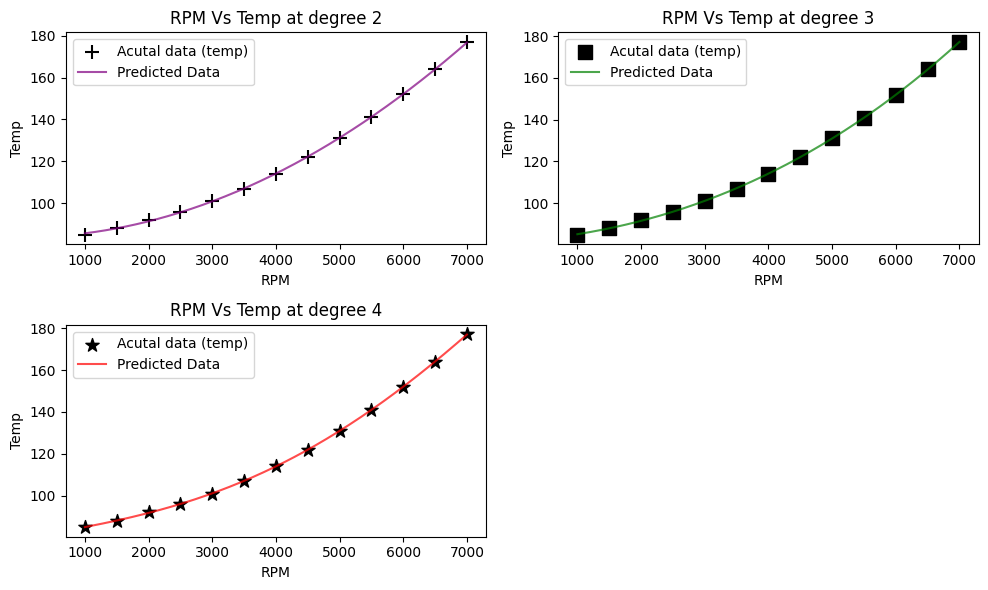

In [105]:
#visualiza of the dataset
plt.figure(figsize=(10,6))


for idx, degree in enumerate(degrees):

    poly_temp = results_temp[degree]['poly_temp']
    model_temp = results_temp[degree]['model_temp']


    
    X_smooth_temp = np.linspace(X.min(),X.max(),300).reshape(-1,1)
    X_smooth_temp_poly = poly_temp.transform(X_smooth_temp)

    pred_y_temp = model_temp.predict(X_smooth_temp_poly)



    plt.subplot(2,2,idx+1)
    plt.scatter(X,y_temp,label='Acutal data (temp)',color='black',marker=markers[idx],s=100)
    plt.plot(X_smooth_temp,pred_y_temp,label='Predicted Data',color=colors[idx],alpha=0.7)
    plt.title(f'RPM Vs Temp at degree {degree}')
    plt.ylabel('Temp')
    plt.xlabel('RPM')
    plt.legend()
plt.tight_layout()
plt.show()

##### Step 3: Find Optimal RPM for Efficiency

In [106]:
best_degree=2

best_model_eff = results[best_degree]['model']
poly_eff = results[best_degree]['poly']

RPM_search = np.linspace(X.min(),X.max(),10000).reshape(-1,1)

RPM_search_poly = poly_eff.transform(RPM_search)

eff_predict = best_model_eff.predict(RPM_search_poly)

max_eff_idx = np.argmax(eff_predict)

optimal_rpm = RPM_search[max_eff_idx]
optimal_rpm_poly = poly_eff.transform(optimal_rpm.reshape(-1,1))

optimal_eff_predict = best_model_eff.predict(optimal_rpm_poly)

print(f'Optimal RPM for the model at degree {best_degree} is {optimal_rpm.item():.4f} and optimal eff is  {optimal_eff_predict.item():.2f}')

Optimal RPM for the model at degree 2 is 3931.2931 and optimal eff is  92.38


#### Optimal RPM visualization

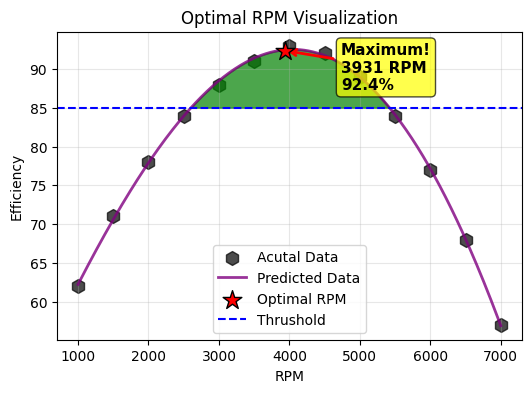

In [107]:
X_smooth_op = results[best_degree]['poly'].transform(X)
y_pred_op = results[best_degree]['model'].predict(X_smooth_op)

plt.figure(figsize=(6,4))

plt.scatter(X,y_eff,label='Acutal Data',color='black',s=100,marker='h',alpha=0.7)
plt.plot(X_smooth, y_pred,label='Predicted Data',color='purple',alpha=0.8,linewidth=2)

plt.scatter([optimal_rpm],[optimal_eff_predict],marker='*',zorder=5,s=200,color='r',edgecolors='black',label='Optimal RPM')

plt.annotate(f'Maximum!\n{optimal_rpm.item():.0f} RPM\n{optimal_eff_predict.item():.1f}%', 
             xy=(optimal_rpm, optimal_eff_predict),
             xytext=(optimal_rpm + 800, optimal_eff_predict - 5),
             fontsize=11, fontweight='bold',
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))


plt.axhline(y=85,label='Thrushold',linestyle='--',linewidth=1.5,color='blue' )

plt.fill_between(X_smooth.flatten(), 85 , y_pred,where=(y_pred>=85),color='green',alpha=0.7)
plt.title("Optimal RPM Visualization")
plt.ylabel('Efficiency')
plt.xlabel('RPM')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout
plt.show()


#### Compare Linear vs Best Polynomial for Temperature

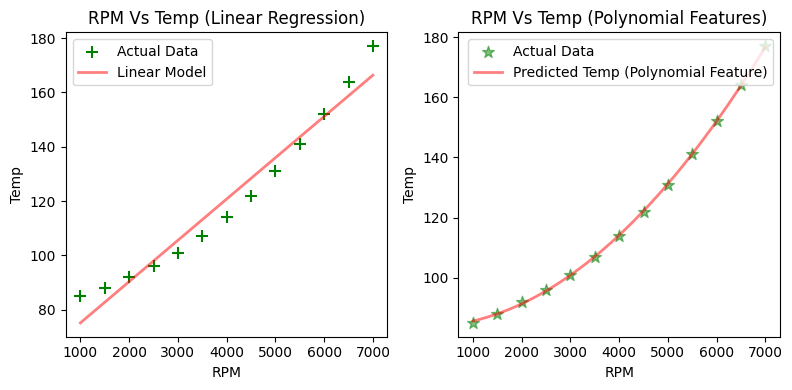

In [108]:
linear_model = LinearRegression()
linear_model.fit(X,y_temp)

pred_y = linear_model.predict(X)

poly_reg_feat = results_temp[2]['poly_temp']
poly_model = results_temp[2]['model_temp']

X_smooth = np.linspace(X.min(),X.max(),300).reshape(-1,1)

X_smooth_temp = poly_reg_feat.transform(X_smooth)
y_smooth_pred = poly_model.predict(X_smooth_temp)


plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.scatter(X,y_temp,label='Actual Data',marker='+',s=80,color='green')
plt.plot(X,pred_y,label='Linear Model',color='r', linewidth=2,alpha=0.5)
plt.title(f'RPM Vs Temp (Linear Regression)')
plt.ylabel('Temp')
plt.xlabel('RPM')
plt.legend()


plt.subplot(1,2,2)
plt.scatter(X,y_temp,label='Actual Data',marker='*',s=80,color='green',alpha=0.5)
plt.plot(X_smooth,y_smooth_pred,label='Predicted Temp (Polynomial Feature)',color='r',alpha=0.5,linewidth=2)
plt.title(f'RPM Vs Temp (Polynomial Features)')
plt.ylabel('Temp')
plt.xlabel('RPM')
plt.legend()

plt.tight_layout()
plt.show()

